In [146]:
import numpy as np
import requests
import pandas as pd  
import matplotlib.pyplot as plt


In [147]:

# Enter your ownkey here
# key =""
# # Defineing the endpoint and parameters
# ticker = "MSFT"  # Fetching data for Microsoft (MSFT)
# url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
# params = {
#     'token': key,
#     'startDate': '2015-01-01',
#     'endDate': '2024-05-10'
# }

# response = requests.get(url,params=params)




In [148]:
# if response.status_code == 200:
    
#     df = pd.DataFrame(response.json())

#     df.to_csv('MFST.csv',index = False)

# else:
#     print(f"Failed to fetch data : {response.status_code}")

In [149]:
df = pd.read_csv('MFST.csv')
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02T00:00:00.000Z,46.760,47.4200,46.54,46.66,27913852,40.304641,40.873526,40.115012,40.218446,27913852,0.0,1.0
1,2015-01-05T00:00:00.000Z,46.325,46.7300,46.25,46.37,39673865,39.929694,40.278782,39.865048,39.968481,39673865,0.0,1.0
2,2015-01-06T00:00:00.000Z,45.650,46.7490,45.54,46.38,36447854,39.347880,40.295159,39.253065,39.977101,36447854,0.0,1.0
3,2015-01-07T00:00:00.000Z,46.230,46.4600,45.49,45.98,29114061,39.847809,40.046057,39.209968,39.632322,29114061,0.0,1.0
4,2015-01-08T00:00:00.000Z,47.590,47.7499,46.72,46.75,29645202,41.020057,41.157882,40.270163,40.296021,29645202,0.0,1.0


In [150]:
df = df.reset_index()['close']


df2 = df.to_numpy()

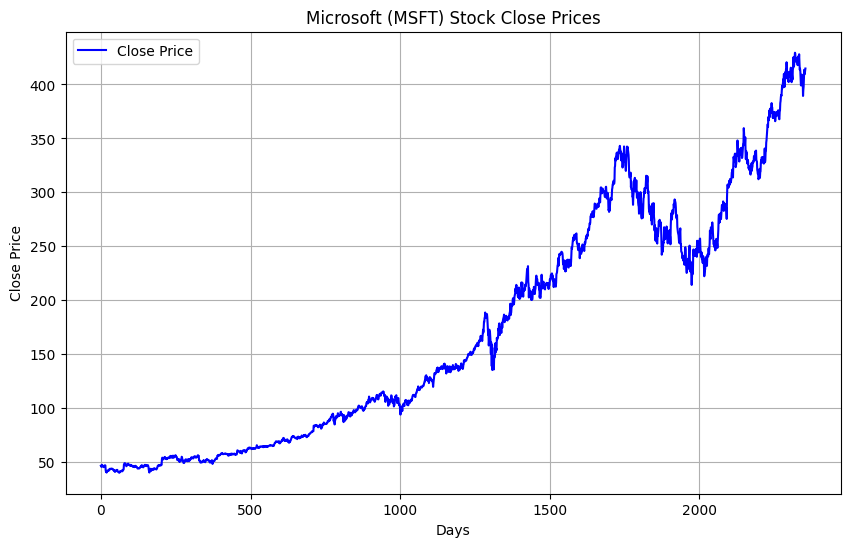

In [151]:
import matplotlib.pyplot as plt

# Plotting the 'close' prices
plt.figure(figsize=(10, 6))
plt.plot(df2, color='blue', label='Close Price')
plt.title('Microsoft (MSFT) Stock Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [152]:
def create_data(df,timestep):
    x=[]
    y=[]

    for i in range(len(df)-timestep):
        
        
        x.append(df[i:i+timestep])
        y.append(df[i+timestep])

    return np.array(x),np.array(y)





In [154]:
size = int(len(df2)*0.7)
train,test = df2[0:size],df2[size:]

print(len(train),len(test))
timestep = 100

1648 707


In [155]:
from sklearn.preprocessing import MinMaxScaler

xscaler = MinMaxScaler()
yscaler = MinMaxScaler()

train= yscaler.fit_transform(train.reshape(-1,1))
test= yscaler.transform(test.reshape(-1,1))

In [156]:
xtrain ,ytrain = create_data(train,100)


In [157]:
xtest,ytest = create_data(test,100)


In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import tensorflow as tf



model = Sequential()
model.add(LSTM(units=50,return_sequences = True,input_shape = (timestep,1)))
model.add(LSTM(units=50,return_sequences = True))
model.add(LSTM(units=50))
model.add(Dense(units =1))

model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs = 100,batch_size = 64,verbose=1)

train_loss = model.evaluate(xtrain,ytrain,verbose=0)





Epoch 1/100


/home/itachi/projects/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0646 - val_loss: 0.0074
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0012 - val_loss: 0.0113
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 5.7052e-04 - val_loss: 0.0108
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 5.1768e-04 - val_loss: 0.0104
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 5.6699e-04 - val_loss: 0.0092
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 5.3215e-04 - val_loss: 0.0132
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 5.4623e-04 - val_loss: 0.0091
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 5.3744e-04 - val_loss: 0.0084
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 5.0444e-04 - val_loss: 0.0081
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 5.4229e-04 - val_loss: 0.0087
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 4.7621e-04 - val_loss: 0.0059
Epoch 12/100
25/25 ━━━━━━━

In [160]:
test_loss = model.evaluate(xtest,ytest,verbose=0)
print(f"Train Loss : {train_loss}")
print(f"Test Loss : {test_loss}")

Train Loss : 0.00012051078374497592
Test Loss : 0.000861370877828449


In [162]:
from sklearn.metrics import mean_squared_error
import math

ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)



ytrain_act = yscaler.inverse_transform(ytrain)
ytest_act = yscaler.inverse_transform(ytest)

ytrain_pred_ =yscaler.inverse_transform(ytrain_pred)
ytest_pred_ = yscaler.inverse_transform(ytest_pred)


trainrmse = math.sqrt(mean_squared_error(ytrain_act,ytrain_pred_))
testrmse = math.sqrt(mean_squared_error(ytest_act,ytest_pred_))

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [163]:
print(f"Train RMSE: {trainrmse}")
print(f"Test RMSE: {testrmse}")

Train RMSE: 2.6590284017184267
Test RMSE: 7.108943016675743


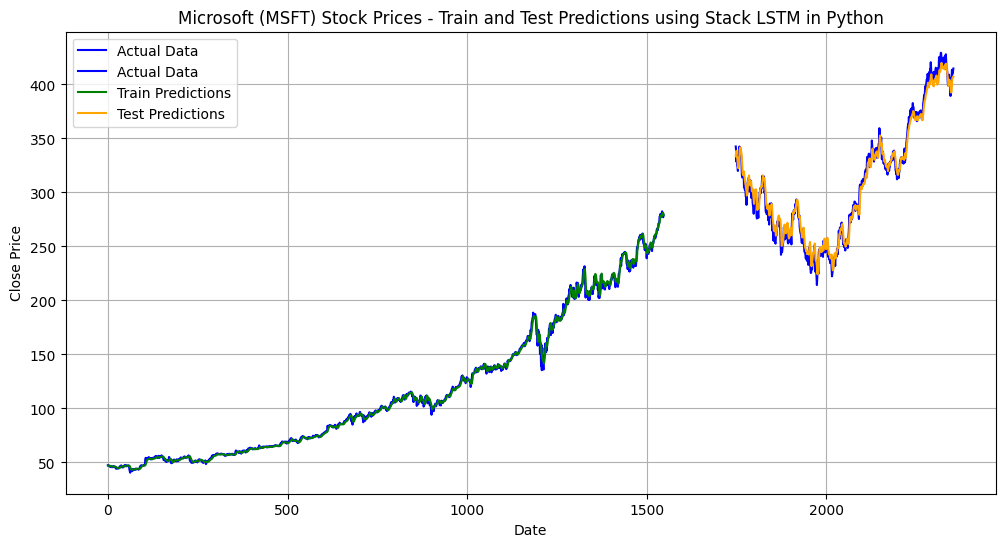

In [165]:
# Ensure that df1_scaled is also inverse transformed to original scale


# Plotting train and test predictions along with actual data


# Plotting train and test predictions along with actual data
plt.figure(figsize=(12, 6))

# Plotting actual data
plt.plot( df.index[:len(ytrain_act)],ytrain_act, label='Actual Data', color='blue')

plt.plot( df.index[-len(ytest_act):],ytest_act, label='Actual Data', color='blue')

# Plotting train predictions
plt.plot(df.index[:len(ytrain_pred)], ytrain_pred_, label='Train Predictions', color='green')

# Plotting test predictions
plt.plot(df.index[-len(ytest_pred):], ytest_pred_, label='Test Predictions', color='orange')

plt.title('Microsoft (MSFT) Stock Prices - Train and Test Predictions using Stack LSTM in Python')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
